In [1]:
import pandas as pd

In [2]:
import sqlite3



In [287]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("./FPA_FOD_20170508.sqlite")


In [288]:
df = pd.read_sql_query("SELECT * from Fires", con)

# Verify that result of SQL query is stored in the dataframe
#print(df.head())

con.close()

In [289]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [280]:
df['LONGITUDE'] = df['LONGITUDE'].apply(lambda x: round(float(x),2))

KeyboardInterrupt: 

In [294]:
df['LATITUDE'] = df['LATITUDE'].apply(lambda x: round(float(x),2))

In [293]:
df['LONGITUDE'].tail()

1880460   -122.39
1880461   -120.94
1880462   -120.94
1880463   -120.90
1880464   -116.83
Name: LONGITUDE, dtype: float64

In [ ]:
for i in range(len(df)):
    df['LATITUDE'][i] = round(df['LATITUDE'][i],2)

In [14]:
df.to_csv('final_dataframe.csv')

In [6]:
import datetime as dt

In [7]:
pip install julian

  Stored in directory: /Users/HustlersParadise/Library/Caches/pip/wheels/ce/b7/8a/aa742c5ae0a627cc1a665f14550988c012f8c38fc15c2f80b9
Successfully built julian
Note: you may need to restart the kernel to use updated packages.


In [8]:
import julian

In [9]:
#df['CONT_DATE']

In [10]:
dt = julian.from_jd(2453403.5)


In [11]:
import numpy as np

In [12]:
import math

In [13]:
df['CONT_DATE'].head()

0    2453403.5
1    2453137.5
2    2453156.5
3    2453189.5
4    2453189.5
Name: CONT_DATE, dtype: float64

In [14]:
df['CONT_DATE'] = df['CONT_DATE'].apply(lambda x: julian.from_jd(x) if np.isnan(x)==False else x)

In [15]:
df['CONT_DATE']= df['CONT_DATE'].apply(lambda x: str(x).split(' ')[0])

In [16]:
df['CONT_DATE'].head()

0    2005-02-02
1    2004-05-12
2    2004-05-31
3    2004-07-03
4    2004-07-03
Name: CONT_DATE, dtype: object

In [263]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape', 'Longitude', 'Latitude'],
      dtype='object')

In [18]:
API_Keys = ['74cb0776a68549e6a1e35942202302', 'cb75f443803149f88a440152202302', '5c44e0e4b67546fd85540157202302' , '8816059be77e4136a7340317202302','61600e44ce0245f29b440504202302', 'd3ff1670c43d4f688d940554202302']



In [19]:
import requests

In [20]:
from wwo_hist import retrieve_hist_data

In [21]:
new_df= pd.DataFrame()

In [22]:
final = []

In [43]:


    
def callapi(api_key,latitude, longitude):
    frequency = 24
    url =f"http://api.worldweatheronline.com/premium/v1/weather.ashx?key={api_key}&q={latitude},{longitude}&num_of_days=1&tp=24&format=json"
    req= requests.get(url)
    #print(req.content)
    
    temp = req.content
#     print(type(temp))
    #temp = temp.transpose()
    #print(type(temp))
    final.append(temp)
    #print(final)

for i in range(1300,1801):
    latitude = df.loc[i,'LATITUDE']
    longitude = df.loc[i,'LONGITUDE']
    #start_time = df.loc[i,'CONT_DATE']
    #end_time= start_time
    callapi('8816059be77e4136a7340317202302',latitude,longitude)
    



In [47]:
from pandas.io.json import json_normalize 
import json  

In [51]:
test_json = pd.read_json(final[0])

In [75]:
temp = test_json.iloc[1,:]
test_json2 = pd.read_json(temp)
test_json2

ValueError: Invalid file path or buffer object type: <class 'pandas.core.series.Series'>

In [163]:
 df.loc[1,'LATITUDE']

38.93305556

In [113]:
for key in API_Keys:
    break

In [80]:
import requests

In [81]:
import json

In [114]:
b = requests.get(a)

In [115]:
b.content

b'{"data":{"request":[{"type":"LatLon","query":"Lat 40.04 and Lon -121.01"}],"current_condition":[{"observation_time":"06:17 AM","temp_C":"12","temp_F":"54","weatherCode":"113","weatherIconUrl":[{"value":"http://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0008_clear_sky_night.png"}],"weatherDesc":[{"value":"Clear"}],"windspeedMiles":"0","windspeedKmph":"0","winddirDegree":"0","winddir16Point":"N","precipMM":"0.0","precipInches":"0.0","humidity":"58","visibility":"16","visibilityMiles":"9","pressure":"1017","pressureInches":"31","cloudcover":"0","FeelsLikeC":"12","FeelsLikeF":"54","uvIndex":1}],"weather":[{"date":"2020-02-22","astronomy":[{"sunrise":"06:48 AM","sunset":"05:47 PM","moonrise":"06:41 AM","moonset":"05:00 PM","moon_phase":"New Moon","moon_illumination":"0"}],"maxtempC":"14","maxtempF":"58","mintempC":"0","mintempF":"33","avgtempC":"6","avgtempF":"43","totalSnow_cm":"0.0","sunHour":"8.7","uvIndex":"1","hourly":[{"time":"24","tempC":"14","tempF":"58","windspee

,data
ClimateAverages,"[{'month': [{'index': '1', 'name': 'January', ..."
current_condition,"[{'observation_time': '06:17 AM', 'temp_C': '1..."
request,"[{'type': 'LatLon', 'query': 'Lat 40.04 and Lo..."
weather,"[{'date': '2020-02-22', 'astronomy': [{'sunris..."


In [166]:
c= pd.read_json(b.content)

In [153]:
c.transpose()

,ClimateAverages,current_condition,request,weather
data,"[{'month': [{'index': '1', 'name': 'January', ...","[{'observation_time': '06:17 AM', 'temp_C': '1...","[{'type': 'LatLon', 'query': 'Lat 40.04 and Lo...","[{'date': '2020-02-22', 'astronomy': [{'sunris..."


In [155]:
e= c['data'][1]

In [81]:
final = [i.decode("utf-8") for i in final]


In [84]:
import ast

In [90]:
final = [ast.literal_eval(i) for i in final]
    

In [93]:
newish_df = json_normalize(final)

In [94]:
newish_df.head()

,data.ClimateAverages,data.current_condition,data.request,data.weather
0,"[{'month': [{'index': '1', 'name': 'January', ...","[{'observation_time': '07:21 AM', 'temp_C': '1...","[{'type': 'LatLon', 'query': 'Lat 40.04 and Lo...","[{'date': '2020-02-22', 'astronomy': [{'sunris..."
1,"[{'month': [{'index': '1', 'name': 'January', ...","[{'observation_time': '07:19 AM', 'temp_C': '-...","[{'type': 'LatLon', 'query': 'Lat 38.93 and Lo...","[{'date': '2020-02-22', 'astronomy': [{'sunris..."
2,"[{'month': [{'index': '1', 'name': 'January', ...","[{'observation_time': '07:21 AM', 'temp_C': '9...","[{'type': 'LatLon', 'query': 'Lat 38.98 and Lo...","[{'date': '2020-02-22', 'astronomy': [{'sunris..."
3,"[{'month': [{'index': '1', 'name': 'January', ...","[{'observation_time': '07:21 AM', 'temp_C': '-...","[{'type': 'LatLon', 'query': 'Lat 38.56 and Lo...","[{'date': '2020-02-22', 'astronomy': [{'sunris..."
4,"[{'month': [{'index': '1', 'name': 'January', ...","[{'observation_time': '07:21 AM', 'temp_C': '-...","[{'type': 'LatLon', 'query': 'Lat 38.56 and Lo...","[{'date': '2020-02-22', 'astronomy': [{'sunris..."


In [186]:

# cols = ['FeelsLikeC', 'FeelsLikeF', 'cloudcover', 'humidity',
#        'observation_time', 'precipInches', 'precipMM', 'pressure',
#        'pressureInches', 'temp_C', 'temp_F', 'uvIndex', 'visibility',
#        'visibilityMiles', 'weatherCode', 'weatherDesc', 'weatherIconUrl',
#        'winddir16Point', 'winddirDegree', 'windspeedKmph', 'windspeedMiles']
n = []

print(n)
for item in newish_df['data.current_condition']:
    temp = json_normalize(item)
    n.append(temp)

    
x = []

for item in newish_df['data.request']:
    temp = json_normalize(item)
    x.append(temp)

[]


In [187]:
df_s6 = pd.concat(n)

In [199]:
df_s7 = pd.concat(x)

In [143]:
for i in newish_df['data.current_condition']:
    temp = json_normalize(i)
    print(temp.columns)
    break

Index(['FeelsLikeC', 'FeelsLikeF', 'cloudcover', 'humidity',
       'observation_time', 'precipInches', 'precipMM', 'pressure',
       'pressureInches', 'temp_C', 'temp_F', 'uvIndex', 'visibility',
       'visibilityMiles', 'weatherCode', 'weatherDesc', 'weatherIconUrl',
       'winddir16Point', 'winddirDegree', 'windspeedKmph', 'windspeedMiles'],
      dtype='object')


In [200]:
df_s7.head()

,query,type
0,Lat 40.04 and Lon -121.01,LatLon
0,Lat 38.93 and Lon -120.40,LatLon
0,Lat 38.98 and Lon -120.74,LatLon
0,Lat 38.56 and Lon -119.91,LatLon
0,Lat 38.56 and Lon -119.93,LatLon


In [205]:
df_s7['query']

0    Lat 40.04 and Lon -121.01
0    Lat 38.93 and Lon -120.40
0    Lat 38.98 and Lon -120.74
0    Lat 38.56 and Lon -119.91
0    Lat 38.56 and Lon -119.93
0    Lat 38.64 and Lon -120.10
0    Lat 38.69 and Lon -120.15
0    Lat 40.97 and Lon -122.43
0    Lat 41.23 and Lon -122.28
0    Lat 38.55 and Lon -120.15
0    Lat 38.69 and Lon -120.16
0    Lat 38.53 and Lon -120.11
0    Lat 38.79 and Lon -120.19
0    Lat 38.43 and Lon -120.51
0    Lat 38.68 and Lon -120.28
0    Lat 38.56 and Lon -120.54
0    Lat 38.52 and Lon -120.21
0    Lat 38.78 and Lon -120.26
0    Lat 38.95 and Lon -120.41
0    Lat 33.44 and Lon -105.72
0    Lat 33.31 and Lon -105.63
0    Lat 33.44 and Lon -105.77
0    Lat 33.56 and Lon -105.77
0    Lat 33.31 and Lon -105.53
0    Lat 33.55 and Lon -105.23
0    Lat 33.32 and Lon -105.51
0    Lat 33.44 and Lon -105.63
0    Lat 33.37 and Lon -105.51
0    Lat 33.39 and Lon -105.64
0    Lat 33.38 and Lon -105.70
               ...            
0    Lat 45.20 and Lon -121.68
0    Lat

In [258]:
df_s7

In [253]:
df_s7.iloc[1,0].split(' ')

['Lat', '40.04', 'and', 'Lon', '-121.01']

In [256]:
df_s7['Longitude'] = df_s7["query"].apply(lambda x: x.split(" ")[4])
#df['Latitude'] = str(df_s7["query"]).split(" ")[2]

In [259]:
df_s7.head()

,query,type,Latitude,Longitude
0,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
1,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
2,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
3,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
4,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01


In [261]:
df_s6.reset_index(drop=True,inplace=True)

In [265]:
newest_df = df_s6.join(df_s7)

In [267]:
newest_df.head()

,FeelsLikeC,FeelsLikeF,cloudcover,humidity,observation_time,precipInches,precipMM,pressure,pressureInches,temp_C,...,weatherDesc,weatherIconUrl,winddir16Point,winddirDegree,windspeedKmph,windspeedMiles,query,type,Latitude,Longitude
0,11,52,0,54,07:21 AM,0.0,0.0,1019,31,12,...,[{'value': 'Clear'}],[{'value': 'http://cdn.worldweatheronline.net/...,SE,140,9,6,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
1,-6,22,0,74,07:19 AM,0.0,0.0,1021,31,-3,...,[{'value': 'Clear'}],[{'value': 'http://cdn.worldweatheronline.net/...,WNW,290,6,4,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
2,9,48,0,66,07:21 AM,0.0,0.0,1019,31,9,...,[{'value': 'Clear'}],[{'value': 'http://cdn.worldweatheronline.net/...,N,0,0,0,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
3,-3,27,0,74,07:21 AM,0.0,0.0,1021,31,-3,...,[{'value': 'Clear'}],[{'value': 'http://cdn.worldweatheronline.net/...,N,0,0,0,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01
4,-3,27,0,74,07:21 AM,0.0,0.0,1021,31,-3,...,[{'value': 'Clear'}],[{'value': 'http://cdn.worldweatheronline.net/...,N,0,0,0,Lat 40.04 and Lon -121.01,LatLon,40.04,-121.01


In [266]:
newest_df.columns

Index(['FeelsLikeC', 'FeelsLikeF', 'cloudcover', 'humidity',
       'observation_time', 'precipInches', 'precipMM', 'pressure',
       'pressureInches', 'temp_C', 'temp_F', 'uvIndex', 'visibility',
       'visibilityMiles', 'weatherCode', 'weatherDesc', 'weatherIconUrl',
       'winddir16Point', 'winddirDegree', 'windspeedKmph', 'windspeedMiles',
       'query', 'type', 'Latitude', 'Longitude'],
      dtype='object')

In [268]:
remove_columns = ['FeelsLikeC', 'temp_C','weatherDesc','weatherIconUrl','query', 'windspeedKmph', 'type', 'precipInches' ]

In [270]:
newest_df.drop(remove_columns, axis=1,inplace=True)

In [272]:
newest_df.to_csv('dataframe')

In [303]:
final_df = newest_df.join(df)

In [315]:
final_df.columns

Index(['FeelsLikeF', 'cloudcover', 'humidity', 'observation_time', 'precipMM',
       'pressure', 'pressureInches', 'temp_F', 'uvIndex', 'visibility',
       'visibilityMiles', 'weatherCode', 'winddir16Point', 'winddirDegree',
       'windspeedMiles', 'Latitude', 'Longitude', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'COUNTY'],
      dtype='object')

In [314]:
final_df.drop(remove_more_columns, axis=1,inplace=True)

KeyError: "['Shape' 'FIPS_NAME' 'FIPS_CODE' 'OBJECTID' 'FOD_ID' 'FPA_ID'\n 'SOURCE_SYSTEM_TYPE' 'SOURCE_SYSTEM' 'NWCG_REPORTING_AGENCY'\n 'NWCG_REPORTING_UNIT_ID' 'NWCG_REPORTING_UNIT_NAME'\n 'SOURCE_REPORTING_UNIT' 'SOURCE_REPORTING_UNIT_NAME'\n 'LOCAL_FIRE_REPORT_ID' 'LOCAL_INCIDENT_ID' 'FIRE_CODE' 'FIRE_NAME'\n 'ICS_209_INCIDENT_NUMBER' 'ICS_209_NAME' 'MTBS_ID' 'MTBS_FIRE_NAME'\n 'COMPLEX_NAME' 'FIRE_YEAR' 'DISCOVERY_DATE' 'DISCOVERY_DOY'\n 'DISCOVERY_TIME' 'STAT_CAUSE_CODE' 'STAT_CAUSE_DESCR' 'CONT_DATE'\n 'CONT_DOY' 'CONT_TIME'] not found in axis"

In [307]:
remove_more_columns = ['Shape','FIPS_NAME','FIPS_CODE','OBJECTID', 'FOD_ID',
       'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME','observation_time']

In [296]:
newest_df.rename(columns={"Latitude": "LATITUDE", "Longitude": "LONGITUDE"})

,FeelsLikeF,cloudcover,humidity,observation_time,precipMM,pressure,pressureInches,temp_F,uvIndex,visibility,visibilityMiles,weatherCode,winddir16Point,winddirDegree,windspeedMiles,LATITUDE,LONGITUDE
0,52,0,54,07:21 AM,0.0,1019,31,54,1,16,9,113,SE,140,6,40.04,-121.01
1,22,0,74,07:19 AM,0.0,1021,31,27,1,16,9,113,WNW,290,4,40.04,-121.01
2,48,0,66,07:21 AM,0.0,1019,31,48,1,16,9,113,N,0,0,40.04,-121.01
3,27,0,74,07:21 AM,0.0,1021,31,27,1,16,9,113,N,0,0,40.04,-121.01
4,27,0,74,07:21 AM,0.0,1021,31,27,1,16,9,113,N,0,0,40.04,-121.01
5,27,0,74,07:21 AM,0.0,1021,31,27,1,16,9,113,N,0,0,40.04,-121.01
6,27,0,74,07:21 AM,0.0,1021,31,27,1,16,9,113,N,0,0,40.04,-121.01
7,46,0,63,07:21 AM,0.0,1017,31,48,1,16,9,113,NE,50,4,40.04,-121.01
8,34,0,61,07:23 AM,0.0,1019,31,34,1,16,9,113,N,0,0,40.04,-121.01
9,27,0,74,07:21 AM,0.0,1021,31,27,1,16,9,113,N,0,0,40.04,-121.01


In [316]:
final_df.columns

Index(['FeelsLikeF', 'cloudcover', 'humidity', 'observation_time', 'precipMM',
       'pressure', 'pressureInches', 'temp_F', 'uvIndex', 'visibility',
       'visibilityMiles', 'weatherCode', 'winddir16Point', 'winddirDegree',
       'windspeedMiles', 'Latitude', 'Longitude', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'COUNTY'],
      dtype='object')

In [227]:
# latitude = []
# longitude = []
# for i in range(len(df_s7)):
#     while(5+8*i < len(df_s7)):
#         latitude.append(str(df_s7["query"]).split(" ")[5+8*i])

KeyboardInterrupt: 

In [311]:
final_df.to_csv('bushfires.csv')

In [211]:
# for i in range(1,len(newish_df['data.current_condition'])):
#     new_df.append(json_normalize(newish_df['data.current_condition'][i]))

In [313]:
final_df.head()

,FeelsLikeF,cloudcover,humidity,observation_time,precipMM,pressure,pressureInches,temp_F,uvIndex,visibility,...,Latitude,Longitude,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY
0,52,0,54,07:21 AM,0.0,1019,31,54,1,16,...,40.04,-121.01,0.10,A,40.04,-121.01,5.0,USFS,CA,63
1,22,0,74,07:19 AM,0.0,1021,31,27,1,16,...,40.04,-121.01,0.25,A,38.93,-120.40,5.0,USFS,CA,61
2,48,0,66,07:21 AM,0.0,1019,31,48,1,16,...,40.04,-121.01,0.10,A,38.98,-120.74,13.0,STATE OR PRIVATE,CA,17
3,27,0,74,07:21 AM,0.0,1021,31,27,1,16,...,40.04,-121.01,0.10,A,38.56,-119.91,5.0,USFS,CA,3
4,27,0,74,07:21 AM,0.0,1021,31,27,1,16,...,40.04,-121.01,0.10,A,38.56,-119.93,5.0,USFS,CA,3


In [336]:
final_df.drop(['FIRE_SIZE_CLASS'],axis=1,inplace=True)

In [337]:
final_df.columns

Index(['FeelsLikeF', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'pressureInches', 'temp_F', 'uvIndex', 'visibility', 'visibilityMiles',
       'winddir16Point', 'winddirDegree', 'windspeedMiles', 'Latitude',
       'Longitude', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'STATE'],
      dtype='object')

In [329]:
final_df['COUNTY'].unique()

array(['63', '61', '17', '3', '5', None, '27', '21', '113', '11', '9',
       '69', '37', '33', '53', '89', '49', '19', '23', '103', '43', '51',
       '39', '13', '25', '47', '31', '510', '7', '57', '1', '137', '91',
       '81', '71', '15', '35', '129', '6', '29', '75', '87', '65', '95',
       '105', '93', '55', '221', '59', '67', '165', '213', '153', '209',
       '123', '215', '77', '85', '169', '161', '45', '229'], dtype=object)

In [338]:
final_df.head()

,FeelsLikeF,cloudcover,humidity,precipMM,pressure,pressureInches,temp_F,uvIndex,visibility,visibilityMiles,winddir16Point,winddirDegree,windspeedMiles,Latitude,Longitude,FIRE_SIZE,LATITUDE,LONGITUDE,STATE
0,52,0,54,0.0,1019,31,54,1,16,9,SE,140,6,40.04,-121.01,0.10,40.04,-121.01,CA
1,22,0,74,0.0,1021,31,27,1,16,9,WNW,290,4,40.04,-121.01,0.25,38.93,-120.40,CA
2,48,0,66,0.0,1019,31,48,1,16,9,N,0,0,40.04,-121.01,0.10,38.98,-120.74,CA
3,27,0,74,0.0,1021,31,27,1,16,9,N,0,0,40.04,-121.01,0.10,38.56,-119.91,CA
4,27,0,74,0.0,1021,31,27,1,16,9,N,0,0,40.04,-121.01,0.10,38.56,-119.93,CA


In [340]:
final_df['winddir16Point'].unique()

array(['SE', 'WNW', 'N', 'NE', 'WSW', 'SW', 'S', 'ESE', 'E', 'NNW', 'ENE',
       'W', 'SSW', 'NNE', 'NW', 'SSE'], dtype=object)

In [343]:
from sklearn.preprocessing import OneHotEncoder 
final_df= pd.get_dummies(final_df, columns=['winddir16Point'])


KeyError: "None of [Index(['winddir16Point'], dtype='object')] are in the [columns]"

In [344]:
final_df.columns

Index(['FeelsLikeF', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'pressureInches', 'temp_F', 'uvIndex', 'visibility', 'visibilityMiles',
       'winddirDegree', 'windspeedMiles', 'Latitude', 'Longitude', 'FIRE_SIZE',
       'LATITUDE', 'LONGITUDE', 'STATE', 'winddir16Point_E',
       'winddir16Point_ENE', 'winddir16Point_ESE', 'winddir16Point_N',
       'winddir16Point_NE', 'winddir16Point_NNE', 'winddir16Point_NNW',
       'winddir16Point_NW', 'winddir16Point_S', 'winddir16Point_SE',
       'winddir16Point_SSE', 'winddir16Point_SSW', 'winddir16Point_SW',
       'winddir16Point_W', 'winddir16Point_WNW', 'winddir16Point_WSW'],
      dtype='object')

In [345]:
final_df= pd.get_dummies(final_df, columns=['STATE'])

In [358]:
final_df.columns

Index(['FeelsLikeF', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'pressureInches', 'temp_F', 'uvIndex', 'visibility', 'visibilityMiles',
       'winddirDegree', 'windspeedMiles', 'Latitude', 'Longitude', 'FIRE_SIZE',
       'LATITUDE', 'LONGITUDE', 'winddir16Point_E', 'winddir16Point_ENE',
       'winddir16Point_ESE', 'winddir16Point_N', 'winddir16Point_NE',
       'winddir16Point_NNE', 'winddir16Point_NNW', 'winddir16Point_NW',
       'winddir16Point_S', 'winddir16Point_SE', 'winddir16Point_SSE',
       'winddir16Point_SSW', 'winddir16Point_SW', 'winddir16Point_W',
       'winddir16Point_WNW', 'winddir16Point_WSW', 'STATE_AR', 'STATE_AZ',
       'STATE_CA', 'STATE_CO', 'STATE_FL', 'STATE_ID', 'STATE_KS', 'STATE_LA',
       'STATE_MN', 'STATE_MO', 'STATE_MT', 'STATE_NC', 'STATE_NE', 'STATE_NM',
       'STATE_NV', 'STATE_OK', 'STATE_OR', 'STATE_SC', 'STATE_SD', 'STATE_TX',
       'STATE_UT', 'STATE_WA', 'STATE_WY'],
      dtype='object')

In [347]:
from sklearn.linear_model import LinearRegression

In [359]:
X_features = final_df.loc[:,['FeelsLikeF', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'pressureInches', 'temp_F', 'uvIndex', 'visibility', 'visibilityMiles',
       'winddirDegree', 'windspeedMiles', 'Latitude', 'Longitude',
       'LATITUDE', 'LONGITUDE', 'winddir16Point_E', 'winddir16Point_ENE',
       'winddir16Point_ESE', 'winddir16Point_N', 'winddir16Point_NE',
       'winddir16Point_NNE', 'winddir16Point_NNW', 'winddir16Point_NW',
       'winddir16Point_S', 'winddir16Point_SE', 'winddir16Point_SSE',
       'winddir16Point_SSW', 'winddir16Point_SW', 'winddir16Point_W',
       'winddir16Point_WNW', 'winddir16Point_WSW', 'STATE_AR', 'STATE_AZ',
       'STATE_CA', 'STATE_CO', 'STATE_FL', 'STATE_ID', 'STATE_KS', 'STATE_LA',
       'STATE_MN', 'STATE_MO', 'STATE_MT', 'STATE_NC', 'STATE_NE', 'STATE_NM',
       'STATE_NV', 'STATE_OK', 'STATE_OR', 'STATE_SC', 'STATE_SD', 'STATE_TX',
       'STATE_UT', 'STATE_WA', 'STATE_WY']].reindex()
# Put the target (housing value -- MEDV) in another DataFrame
target = final_df["FIRE_SIZE"]

In [360]:
X_features.columns

Index(['FeelsLikeF', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'pressureInches', 'temp_F', 'uvIndex', 'visibility', 'visibilityMiles',
       'winddirDegree', 'windspeedMiles', 'Latitude', 'Longitude', 'LATITUDE',
       'LONGITUDE', 'winddir16Point_E', 'winddir16Point_ENE',
       'winddir16Point_ESE', 'winddir16Point_N', 'winddir16Point_NE',
       'winddir16Point_NNE', 'winddir16Point_NNW', 'winddir16Point_NW',
       'winddir16Point_S', 'winddir16Point_SE', 'winddir16Point_SSE',
       'winddir16Point_SSW', 'winddir16Point_SW', 'winddir16Point_W',
       'winddir16Point_WNW', 'winddir16Point_WSW', 'STATE_AR', 'STATE_AZ',
       'STATE_CA', 'STATE_CO', 'STATE_FL', 'STATE_ID', 'STATE_KS', 'STATE_LA',
       'STATE_MN', 'STATE_MO', 'STATE_MT', 'STATE_NC', 'STATE_NE', 'STATE_NM',
       'STATE_NV', 'STATE_OK', 'STATE_OR', 'STATE_SC', 'STATE_SD', 'STATE_TX',
       'STATE_UT', 'STATE_WA', 'STATE_WY'],
      dtype='object')

In [355]:
target.head()

0    0.10
1    0.25
2    0.10
3    0.10
4    0.10
Name: FIRE_SIZE, dtype: float64

In [374]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split(X_features, target, test_size=0.33, random_state=42)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [375]:
predictions = lm.predict(X_test)

In [376]:
from sklearn.preprocessing import StandardScaler
Sc_x=StandardScaler()
X_test_scaled=Sc_x.fit_transform(X_test)
X_train_scaled=Sc_x.fit_transform(X_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [379]:
lm.score(X_test_scaled,y_test)

-34.442502731754075

ValueError: x and y must be the same size

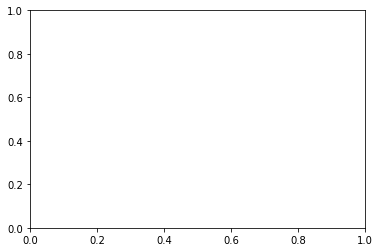